概要：文本属性有产地，品种类型和年月日（以周为单位，样本记录的是以周为单位的销量和平均价格）。

1.首先需要设置matplotlib绘图环境

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

2.导入牛油果价格数据。

In [3]:
import pandas as pd

AVOCADO_PATH = os.path.join("datasets", "avocado")

def load_avocado_data(avocado_path=AVOCADO_PATH):
    csv_path = os.path.join(avocado_path, "avocado.csv")
    return pd.read_csv(csv_path)

avocado = load_avocado_data()
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


3.分析数据。

In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


4.将序号去掉，这个属性不是特征。

In [7]:
avocado.drop("Unnamed: 0", axis=1, inplace=True)

5.转换“品种类型”文本属性。

In [9]:
avocado["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

类型分为有机和普通。

In [11]:
from sklearn.preprocessing import OrdinalEncoder
avocado_type = avocado[['type']]
ordinal_encoder = OrdinalEncoder()
avocado_type_encoded = ordinal_encoder.fit_transform(avocado_type)
avocado_type_encoded[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

自动为属性分配数值，conventional 为0，organic为1。 

该属性只有两个值，所以不用转换为稀疏矩阵。

6.转换“产地”文本属性。

In [13]:
avocado["region"].value_counts().sort_values().count()

54

产地共有54个。

In [9]:
avocado["region"].value_counts().sort_values()

WestTexNewMexico       335
Tampa                  338
Philadelphia           338
Boise                  338
Albany                 338
RichmondNorfolk        338
Seattle                338
Syracuse               338
Indianapolis           338
SanDiego               338
Plains                 338
NorthernNewEngland     338
Orlando                338
HarrisburgScranton     338
Houston                338
Jacksonville           338
Roanoke                338
BuffaloRochester       338
CincinnatiDayton       338
Midsouth               338
GreatLakes             338
Charlotte              338
Nashville              338
Atlanta                338
BaltimoreWashington    338
Detroit                338
Columbus               338
TotalUS                338
RaleighGreensboro      338
NewYork                338
SouthCarolina          338
NewOrleansMobile       338
Denver                 338
LosAngeles             338
HartfordSpringfield    338
Sacramento             338
West                   338
M

In [16]:
avocado_region = avocado[['region']]
ordinal_encoder = OrdinalEncoder()
avocado_region_encoded = ordinal_encoder.fit_transform(avocado_region)
avocado_region_encoded[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

使用OneHotEncoder类将产地属性转换为独热编码。

In [17]:
from sklearn.preprocessing import OneHotEncoder
region_encoder = OneHotEncoder(categories='auto')
avocado_region_1hot = region_encoder.fit_transform(avocado_region_encoded.reshape(-1,1))
avocado_region_1hot

<18249x54 sparse matrix of type '<class 'numpy.float64'>'
	with 18249 stored elements in Compressed Sparse Row format>

In [18]:
avocado_region_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

7.拆分数据集。从上面的分析可知，总销量（Total Volume）对价格的影响是最大的，所以切分数据集的时候，需要将总销量分段，每段的样本数要平均。

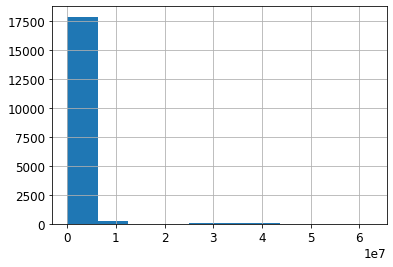

In [28]:
avocado["Total Volume"].hist(bins=10)

In [29]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


总销量的均值是85万只/周，最小值8.45只/周，最大值6250万只/周。

25%的样本总销量小于1万只/周，50%的样本总销量小于10万只/周，75%的样本总销量小于43万只/周。
总销量分为5段，1只-1万只，1万只-10万只，10万只-50万只，50万只-85万只，85万只-6350万只

In [33]:
avocado["Total Volume Cat"] = pd.cut(avocado["Total Volume"],
                               bins=[1., 10000.0, 100000.0, 500000.0, 850000.0, np.inf],
                               labels=[1, 2, 3, 4, 5])
avocado["Total Volume Cat"].value_counts()

3    5159
2    4649
1    4299
5    2733
4    1409
Name: Total Volume Cat, dtype: int64

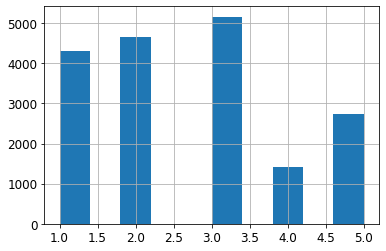

In [34]:
avocado["Total Volume Cat"].hist()

大部分的样本总销量小于50万只/周，2733个样本总销量大于85万只/周，说明牛油果的销售有特定的旺季。

8.下面开始按照特征“Total Volume Cat”来切分数据集。

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(avocado, avocado["Total Volume Cat"]):
    strat_train_set = avocado.loc[train_index]
    strat_test_set = avocado.loc[test_index]

In [36]:
strat_test_set["Total Volume Cat"].value_counts() / len(strat_test_set)

3    0.282740
2    0.254795
1    0.235616
5    0.149589
4    0.077260
Name: Total Volume Cat, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

def total_volume_proportions(data):
    return data["Total Volume Cat"].value_counts() / len(data)

train_set, test_set = train_test_split(avocado, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": total_volume_proportions(avocado),
    "Stratified": total_volume_proportions(strat_test_set),
    "Random": total_volume_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [38]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.235575,0.235616,0.239178,1.529677,0.017780
2,0.254754,0.254795,0.255342,0.231118,0.016029
3,0.282700,0.282740,0.284658,0.692292,0.013903
4,0.077210,0.077260,0.073425,-4.902301,0.065489
5,0.149762,0.149589,0.147397,-1.578756,-0.115243


In [ ]:
可以看到，按照总销量属性拆分数据集，误差是比较小的。